In [265]:
%pip install python_igraph
%pip install infomap

%pip install cairocffi


Below cell is a graph structure of nodes and edges to be called by form graph function. Form graph would also work with pandas dataframe objects as in the task given. 

In [288]:
import igraph as ig
import networkx as nx
import pylab as plt
from random import randint

In [267]:
import pandas as pd 

def read_tsv_dean_gave_me(fp):
  return pd.read_csv(fp, delimiter="  ", skiprows=4, name=['nodes', 'edges'])

'''
df = read_tsv_dean_gave_me(fp)       put a file path in me
nodes = df['nodes']
edges= df['edges']

Pass a fp into me and then pass me into 

'''


"\ndf = read_tsv_dean_gave_me(fp)       put a file path in me\nnodes = df['nodes']\nedges= df['edges']\n\nPass a fp into me and then pass me into \n\n"

In [290]:
def form_graph(edge_list):
  '''forms a Networkx directed graph from a list of edges
     takes in- list of tuples
     returns- graph object visualised, list object of edges'''
  G = nx.DiGraph()
    
  for e in _edges:
      G.add_edge(e[0], e[1], weight = 1)

    
  pos = nx.spring_layout(G)
  plt.figure()
  plt.axis('off')
  nx.draw_networkx_edges(G, pos, edge_color='r')
  nx.draw_networkx_nodes(G, pos, alpha=0.8, node_size=50, node_color='w')
  nx.draw_networkx_labels(G, pos, font_size=12)

  plt.figure(figsize=(20,20)) 
  plt.show()

  edges_from_nx = G.edges()
  return G, edges_from_nx


def community_finder(edges_from_graph):
  '''takes in list of edges and returns an array of lists, of communities in the structure
     takes in- edges of graph: list of tuples
     returns- list of communities'''
  tuple_list = ig.Graph.TupleList(edges_from_graph)

  infomap = tuple_list.community_infomap()
  print("list of communities: ", infomap)
  return infomap 


def place_in_subgroup(new_val, infomap_list):
  '''takes in a tuple for a new graph point, finds its community'''
  new_val_edge = new_val[1]

  #Pad array to allow for np.where 
  top = max([len(i) for i in infomap_list])
  mol = np.asarray([np.pad(i, (0, top-len(i)), 'constant', constant_values=-1) for i in infomap_list])

  where = np.where(mol==new_val_edge)
  print("belong in subgroup: ", where[0])
  print(where[0])

  return where[0]


def rank_community(community_list, edge_list, graph):
  '''takes in community, ranks them based off how many edges a given node has
  
      takes in- community_list: list of index positions for all the edges in the community
                edge_list: the data structure for the whole graph
                graph: the pre made graph structure
                
      returns- sorted list of tuples, tuple(0) = number of edges from node
                                      tuple(1) = index position of node in edge_list
  '''
  community_nodes = list(edge_list[item][0] for item in community_list)

  #Get a list of the how many edges each of the community nodes has coming off it
  list_num_edges = []
  for node in community_nodes:
    num_edges = len(graph.out_edges(node))
    list_num_edges.append(num_edges)
  
  #Get a list of tuples of community nodes and number of edges
  final_list = []
  for i in range(len(list_num_edges)):
    temp = [list_num_edges[i], community_nodes[i]]
    final_list.append(temp)


  #Final list is a list of lists, first element in each list is 
  final_list = sorted(final_list, reverse=True)

  print("sorted list of points by their number of edges:", final_list)
  return final_list


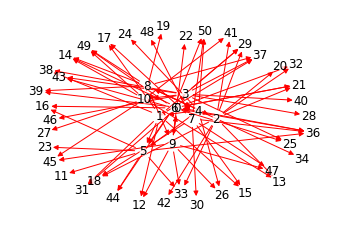

<Figure size 1440x1440 with 0 Axes>

list of communities:  Clustering with 50 elements and 7 clusters
[0] 1, 8, 37, 31, 14, 0, 39
[1] 15, 17, 18, 7, 30, 47, 48
[2] 29, 2, 20, 21, 32, 42
[3] 5, 6, 44, 36, 16, 50, 23, 11, 4, 34, 24
[4] 12, 33, 9, 26, 22
[5] 38, 25, 43, 3, 46, 28, 40
[6] 13, 41, 10, 49, 45, 19, 27
belong in subgroup:  [2]
[2]
sorted list of points by their number of edges: [[10, '3'], [10, '0'], [10, '0'], [7, '9'], [7, '8'], [7, '10']]


In [292]:
#Define data structure for analysis 
_edges = [(str(randint(0, 10)), str(randint(0, 50))) for _ in range(100)]


def main():
  #Defined a new val, EDGE CASE ISSUE- If edge isnt in the list "_edges", will automatically put in community 0, this is wrong
  new_val_1 = (439,2)

  #Create the graph structure 
  graph, edges_from_nx = form_graph(_edges)

  #Find the cluster the new point belongs in 
  community_found = community_finder(edges_from_nx)

  #Finds the group new point belongs in 
  subgroup = place_in_subgroup(new_val_1, community_found)
  
  #Ranks the nodes in the cluster based off number of edges coming of them 
  rank_community(community_found[subgroup], _edges, graph)


if __name__ == "__main__":
  main()

In cases where nodes have the same number of edges, could go on to rank hirarchally by shortest path from new node using Dijkstra's  algorithm.

Interesting extensions: 

The node values (in this dummy case ints, in your example dean I think they were hashcodes to document ID's) can be used to create graph communities. 

If we could derive a weighting factor, such as some courts being more valuable, some papers being referanced more often ect, could produce a weighted directed graph. This would allow for some more interesting clustering methods like spectral decomposition using sci-kit learn. 

Further information delineating the node types like court could also allow for the use of graph neural networks to classify a potential node document as a specific type, and recommend based off that.

If user data was added, such as their document ID history, a collaborative filtering method could be used to tailor document recommendations to the specifc user.